In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving train_data.txt to train_data (3).txt


In [ ]:
# Replace 'train_data.txt' with the actual name of the uploaded file
file_name = 'train_data.txt'

# Read the file with a custom delimiter
train_data = pd.read_csv(file_name, sep=':::', names=['Title', 'Genre', 'Description'], engine='python', header=None)


In [ ]:
# Display the first few rows
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
train_data.isnull().sum()

,0
Title,0
Genre,0
Description,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


<ipython-input-10-47e43e52b71f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


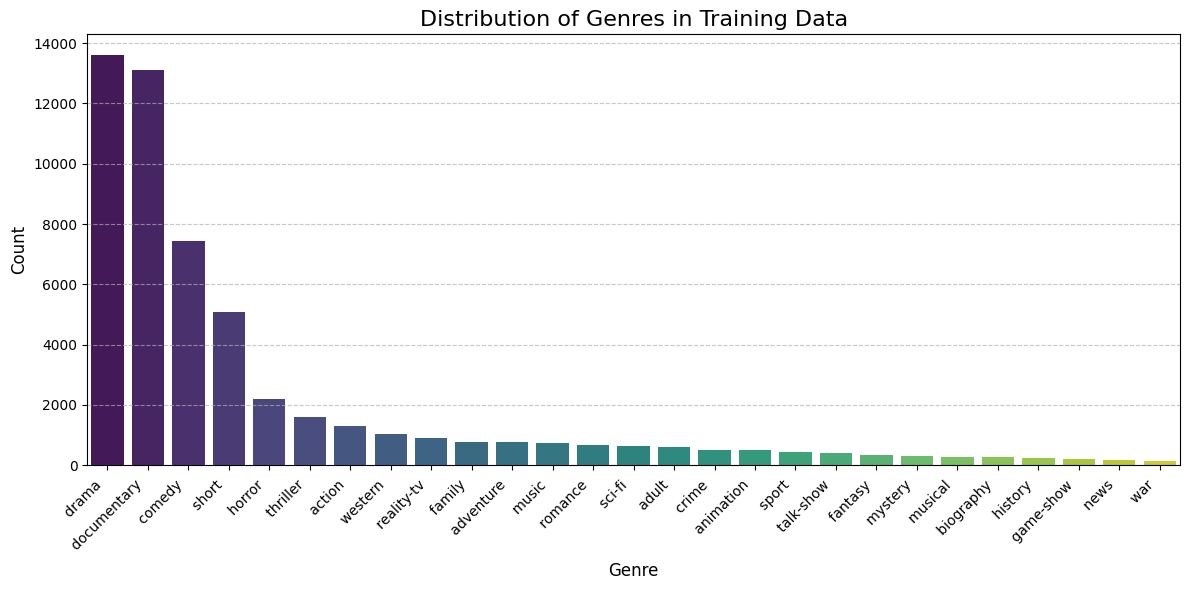

In [ ]:
genre_counts = train_data['Genre'].value_counts()
genre_counts = genre_counts.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Genres in Training Data', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving test_data.txt to test_data (2).txt


In [ ]:
# Replace 'test_data.txt' with the actual name of the uploaded file
file_name = 'test_data.txt'

# Read the file with a custom delimiter
test_data = pd.read_csv(file_name, sep=':::', names=['Title', 'Genre', 'Description'], engine='python', header=None)

In [ ]:
# Display the first few rows
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
train_data.isnull().sum()

,0
Title,0
Genre,0
Description,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


<ipython-input-19-deaaec24bbe1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y="Genre", order= train_data["Genre"].value_counts().index, palette = "YlGnBu")


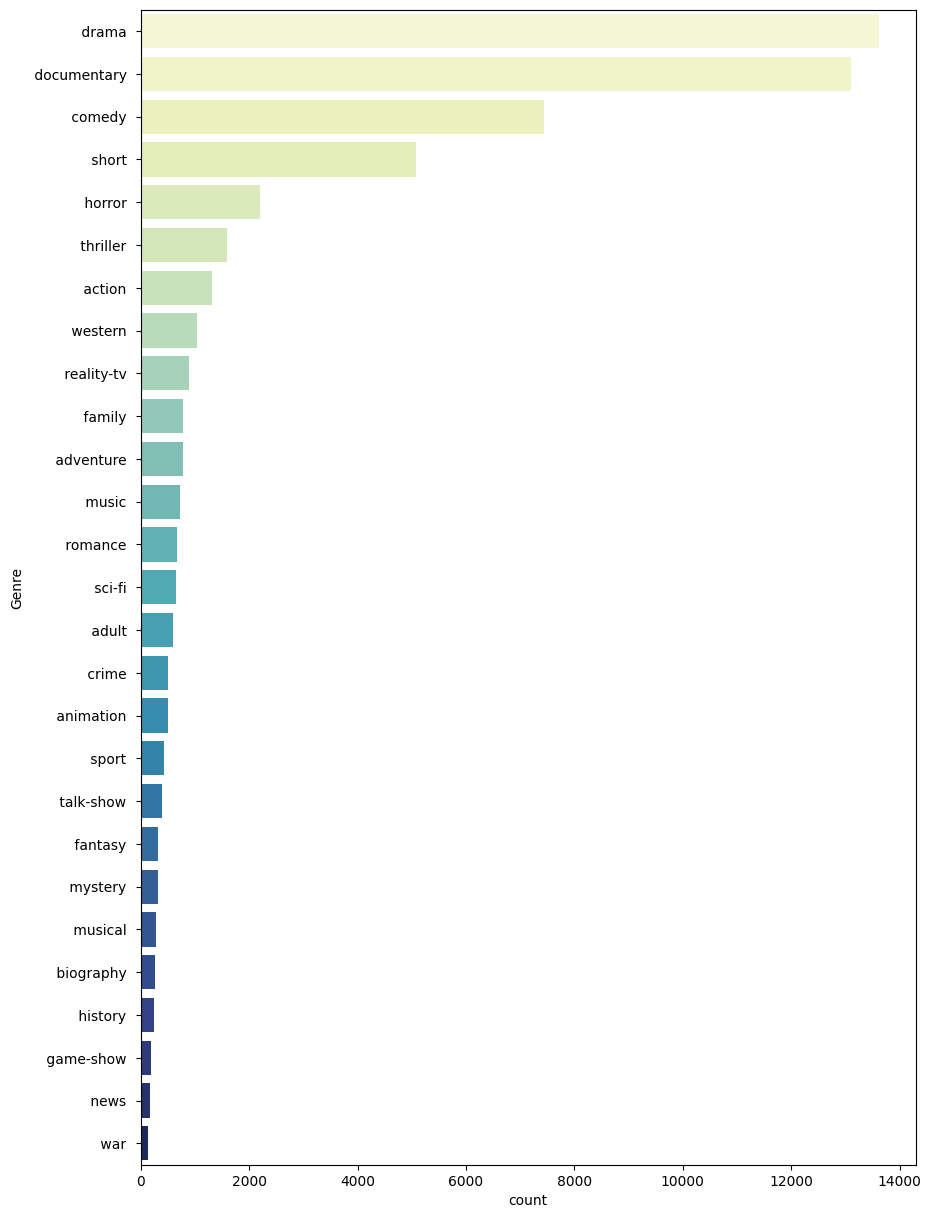

In [ ]:
plt.figure(figsize=(10,15))
sns.countplot(data=train_data, y="Genre", order= train_data["Genre"].value_counts().index, palette = "YlGnBu")
plt.show()

In [ ]:
# Load test data solution
from google.colab import files

uploaded = files.upload()

Saving test_data_solution.txt to test_data_solution (2).txt


In [ ]:
# Replace 'test_data.txt' with the actual name of the uploaded file
file_name = 'test_data_solution.txt'

# Read the file with a custom delimiter
test_data_solution = pd.read_csv(file_name, sep=':::', names=['Title', 'Genre', 'Description'], engine='python', header=None)

In [ ]:
# Display the first few rows
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
train_data.isnull().sum()

,0
Title,0
Genre,0
Description,0


In [ ]:
train_data.isnull().sum()

,0
Title,0
Genre,0
Description,0


In [ ]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
import re
import nltk #a powerful library for working with human language data.
from nltk.corpus import stopwords #for cleaning
from nltk.stem import LancasterStemmer ##

stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))  # Stopwords set

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

train_data['clean_description'] = train_data['Description'].apply(cleaning_data)
test_data['clean_description'] = test_data['Description'].apply(cleaning_data)


In [ ]:
test_data_solution['clean_description'] = test_data_solution['Description'].apply(cleaning_data)

In [ ]:
test_data.head(20)

,Title,Genre,Description,clean_description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother years serious cance...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...
5,6,Riddle Room (2016),Emily Burns is being held captive in a room w...,emily burns held captive room idea got determi...
6,7,L'amica (1969),The beautiful but neglected wife of a brillia...,beautiful neglected wife brilliant architect m...
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...,vasu inamdar ina suffers disorder sees comes d...
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...,insight tornados hit kensal rise birmingham su...
9,10,Press (2011),Press is a story of young people overwhelmed ...,press story young people overwhelmed social di...


In [ ]:
# Prepare features and target variables
X_train = train_data['clean_description']
y_train = train_data['Genre']
X_test = test_data_solution['clean_description']  # Use solution for test labels
y_test = test_data_solution['Genre']

In [ ]:
# Create a TF-IDF vectorizer and logistic regression pipeline
pipeline = make_pipeline(
    TfidfVectorizer(max_features=5000),
    LogisticRegression(max_iter=1000, random_state=42)
)

In [ ]:
# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_features=5000)),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
# Make predictions
y_pred = pipeline.predict(X_test)


In [ ]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.5847970479704797


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
                precision    recall  f1-score   support

      action        0.47      0.29      0.36      1314
       adult        0.58      0.23      0.33       590
   adventure        0.55      0.16      0.25       775
   animation        0.53      0.06      0.11       498
   biography        0.00      0.00      0.00       264
      comedy        0.53      0.58      0.55      7446
       crime        0.38      0.04      0.07       505
 documentary        0.68      0.85      0.75     13096
       drama        0.54      0.77      0.64     13612
      family        0.50      0.09      0.15       783
     fantasy        0.53      0.05      0.09       322
   game-show        0.88      0.51      0.64       193
     history        0.00      0.00      0.00       243
      horror        0.64      0.57      0.60      2204
       music        0.66      0.45      0.54       731
     musical        0.21      0.02      0.03       276
     mystery        0.31      0.01     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Optional: Show sample predictions
test_data['Predicted_Genre'] = y_pred
print("\nSample Predictions:\n", test_data[['Title', 'Genre', 'Predicted_Genre']].head(10))


Sample Predictions:
    Title                                         Genre Predicted_Genre
0      1                         Edgar's Lunch (1998)           drama 
1      2                     La guerra de papá (1977)           drama 
2      3                  Off the Beaten Track (2010)     documentary 
3      4                       Meu Amigo Hindu (2015)           drama 
4      5                            Er nu zhai (1955)           drama 
5      6                           Riddle Room (2016)           drama 
6      7                               L'amica (1969)           drama 
7      8                         Ina Mina Dika (1989)          comedy 
8      9   Equinox Special: Britain's Tornados (2005)     documentary 
9     10                                 Press (2011)           drama 
